In [1]:
import random
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import dateutil

In [2]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_norm = pd.read_csv(r'..\data\processed\lipidomics_linregress_normalized_data.csv')
fr_filt = pd.read_csv(r'..\data\processed\lipidomics_normalized_filtered_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 
                            1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

In [3]:
df = fr_filt
df2 = np.log2(df[fr_quant_filenames_in_analytical_order].T)
fg = file_grouping[file_grouping['fr_name'].isin(fr_quant_filenames_in_analytical_order)]
fg = fg.reset_index()[['fr_name', 'rat_label', 'bg_type', 'glucose_tolerance', 'bg']].set_index('fr_name')
df = df2.join(fg)
ogtt_lookup = animal_phenotypes[['animal', 'OGTT (AUC)']]
df['ogtt'] = df['rat_label'].apply(lambda x: ogtt_lookup[ogtt_lookup['animal'] == (int(x))]['OGTT (AUC)'].values[0])
# rename columns to remove '.' because it messes with the formula notation 
new_cols = {}
for col in df.columns:
    new_cols[col] = col.replace('.', '').replace(':', '').replace('-', '')\
    .replace('[', '').replace(']', '')
df = df.rename(new_cols, axis=1)
display(df)

,unknown_67905463_0536,unknown_6411087_0537,unknown_95115973_0541,unknown_32903067_0542,unknown_96913147_0544,unknown_62313641_0546,unknown_29108359_0551,unknown_35299652_0553,unknown_24709372_0554,unknown_60514441_0555,...,unknown_89782532_20148,unknown_9749118_20163,unknown_59358716_20175,unknown_87180945_20196,unknown_100393829_20435,rat_label,bg_type,glucose_tolerance,bg,ogtt
20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27),20.405355,21.533648,20.665848,24.400930,19.378685,23.049698,28.481360,19.316892,24.328078,19.478253,...,18.897008,16.810111,17.724121,18.400646,16.655211,1076.0,FBG,diabetic,71.000000,2321.25
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),23.313111,24.586227,23.731244,26.811664,22.709669,26.254519,30.305095,22.008084,26.237893,23.669177,...,19.348489,17.364343,19.240306,18.585339,16.313637,1062.0,FBG,impaired,52.333333,1648.75
20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49),23.218699,24.375151,23.038733,26.708762,21.722467,26.085255,29.595696,22.149967,25.628550,23.638288,...,21.529536,20.099612,21.430516,20.968101,19.339229,1093.0,FBG,normal,64.000000,993.00
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),24.012349,25.685664,24.916555,25.977120,23.985839,27.293718,31.938325,22.246767,27.005584,24.827176,...,17.921098,18.430542,17.488155,16.202162,17.985491,1060.0,RBG,impaired,225.000000,1761.75
20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39),24.302356,25.422294,24.042666,27.313654,22.321161,26.913271,30.455412,22.475813,26.363764,23.854459,...,20.133479,17.986741,19.996615,19.778245,17.357845,1091.0,FBG,normal,48.500000,846.75
20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44),23.901455,24.936916,24.162971,27.337061,23.184906,26.682437,30.690269,22.495336,26.325506,23.984926,...,17.824376,18.099621,17.383197,15.556400,17.582655,1092.0,RBG,impaired,70.500000,1377.95
20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52),23.883301,24.779941,23.627979,27.415597,22.795191,26.236176,29.854529,22.337295,25.798043,23.349277,...,18.836779,18.145468,18.282680,16.603878,17.887551,1093.0,RBG,normal,69.500000,993.00
20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33),23.387975,24.696276,24.085858,27.230430,22.878785,26.307266,30.106764,22.612902,26.021376,23.659766,...,19.255315,14.496938,19.507853,19.379093,13.846921,1082.0,FBG,diabetic,50.000000,2224.75
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),24.421692,25.054941,23.169508,27.598719,22.397716,26.123572,29.717328,22.790052,25.559916,22.258087,...,18.261890,18.854601,17.718258,16.494586,18.466842,1060.0,RBG,impaired,83.000000,1761.75
20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),23.463756,24.934805,24.010849,27.126653,22.703282,26.680311,30.314104,22.526302,26.226352,24.184003,...,19.685160,18.324624,19.526233,18.844052,17.739443,1101.0,FBG,diabetic,43.000000,2015.75


In [4]:
random_col = random.choice(df.drop(df.filter(regex='unknown').columns, axis=1).columns)
print(random_col)

lmem_continuous = smf.mixedlm(f"{random_col} ~ ogtt * bg_type", df, groups=df['rat_label']).fit(maxiter=100)
print(lmem_continuous.summary(), "\n\n")

lmem_categorical = smf.mixedlm(f"{random_col} ~ glucose_tolerance * bg_type", df, groups=df['rat_label']).fit(maxiter=100)
print(lmem_categorical.summary())



TG_6213_99478577_14489
               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: TG_6213_99478577_14489
No. Observations: 60      Method:             REML                  
No. Groups:       10      Scale:              0.5574                
Min. group size:  6       Likelihood:         -87.8198              
Max. group size:  6       Converged:          Yes                   
Mean group size:  6.0                                               
---------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept             19.962     0.790  25.261  0.000  18.414  21.511
bg_type[T.RBG]        -4.537     0.701  -6.477  0.000  -5.910  -3.164
ogtt                   0.001     0.000   2.381  0.017   0.000   0.002
ogtt:bg_type[T.RBG]    0.002     0.000   5.206  0.000   0.001   0.003
Group Var           

TG_6213_99478577_14489


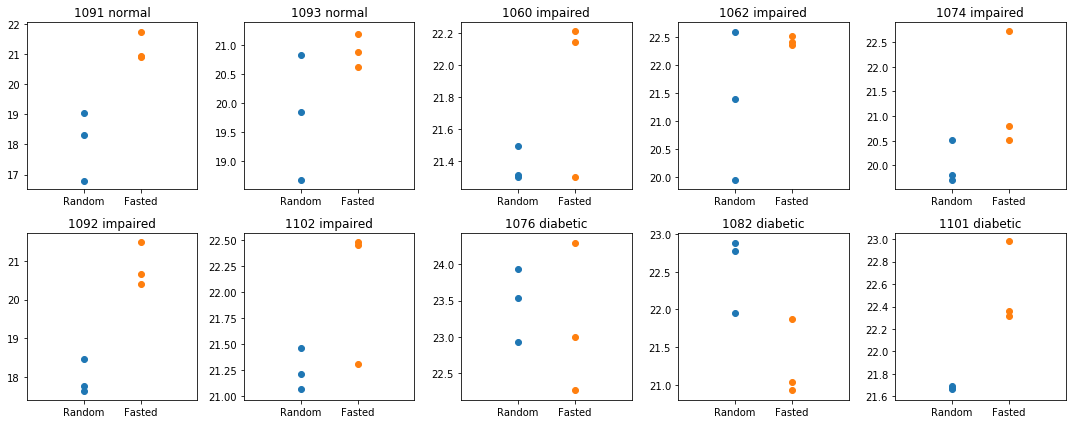

In [5]:
print(random_col)
for i, animal in enumerate(animals_used):
    ax = plt.subplot(2, 5, i+1, )
    ax.set_xlim((0,3))
    ax.set_title(str(animal) + ' ' + str(animal_to_tolerance_dict[animal]))
    ax.set_xticks([1,2])
    ax.set_xticklabels( ['Random', 'Fasted'])
    for j, bg_type in enumerate(['RBG', 'FBG']):
        
        ax.scatter(3*[j+1], df[random_col].filter(regex=(str(animal))).filter(regex=bg_type))
        
        
# plt.xticks(range(1,11), [str(animal) for animal in animals_used]);
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.tight_layout()